In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
#Making A column of 0 and 1
df_fake['class'] = 0
df_true['class'] = 1

In [6]:
df_fake.head(2)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [7]:
df_true.shape,df_fake.shape

((21417, 5), (23481, 5))

In [8]:
#lets remove the last 10 rows for amnual testing
#fake data
data_fake_manual_testing = df_fake.tail(10)

for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)

#True data     
data_true_manual_testing = df_true.tail(10)

for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [9]:
df_fake.shape,df_true.shape

((23471, 5), (21407, 5))

Last 10 rows are removed here

In [10]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\91620\AppData\Local\Temp/ipykernel_6532/277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\91620\AppData\Local\Temp/ipykernel_6532/277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [11]:
#testing fake data
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
#testing true data
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
data_merge = pd.concat([df_fake, df_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
df = data_merge.drop(columns=['title','subject','date'],axis = 1)

In [16]:
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [17]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
#To shufftle the data
df = df.sample(frac = 1)

In [19]:
df.head()

,text,class
21626,Remember Joni Ernst? Conservatives were so exc...,0
6704,WASHINGTON (Reuters) - President-elect Donald ...,1
20974,President Barack Obama and First Lady Michelle...,0
17897,CANBERRA (Reuters) - Australia is trying to mo...,1
7696,CHICAGO (Reuters) - The Republican Party’s gri...,1


but here index is not in the order

In [20]:
df.reset_index(inplace = True)


In [21]:
df.head()

,index,text,class
0,21626,Remember Joni Ernst? Conservatives were so exc...,0
1,6704,WASHINGTON (Reuters) - President-elect Donald ...,1
2,20974,President Barack Obama and First Lady Michelle...,0
3,17897,CANBERRA (Reuters) - Australia is trying to mo...,1
4,7696,CHICAGO (Reuters) - The Republican Party’s gri...,1


In [22]:
df.drop(['index'], axis = 1, inplace = True)

In [23]:
df.head()

,text,class
0,Remember Joni Ernst? Conservatives were so exc...,0
1,WASHINGTON (Reuters) - President-elect Donald ...,1
2,President Barack Obama and First Lady Michelle...,0
3,CANBERRA (Reuters) - Australia is trying to mo...,1
4,CHICAGO (Reuters) - The Republican Party’s gri...,1


In [24]:
df['class'].value_counts()

0    23471
1    21407
Name: class, dtype: int64

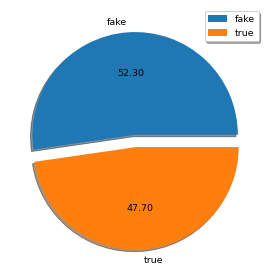

In [25]:
plt.figure(figsize=(5,5),dpi = 68)
plt.pie(df['class'].value_counts(), labels = ['fake','true'],autopct ="%0.2f",explode = [0,0.12],
       shadow = True)
plt.legend(shadow = True)
plt.show()

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91620\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_char']= df['text'].apply(len)

In [29]:
df['num_char'].sort_values()

22438        1
34102        1
34138        1
34157        1
34169        1
         ...  
9069     48835
38846    49705
26187    49705
22960    51794
21023    51794
Name: num_char, Length: 44878, dtype: int64

In [30]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [31]:
df['num_words'].sort_values()

22438       0
32979       0
19444       0
19447       0
19553       0
         ... 
9069     8616
12882    8616
22960    8888
21023    8888
30293    9957
Name: num_words, Length: 44878, dtype: int64

In [32]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
df['num_sent'] 

0         4
1        35
2         1
3        15
4        29
         ..
44873    17
44874    33
44875     2
44876    12
44877    29
Name: num_sent, Length: 44878, dtype: int64

In [34]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,44878.000000,44878.000000,44878.000000
mean,2468.296404,453.301551,14.862271
std,2169.054176,394.306982,12.681049
min,1.000000,0.000000,0.000000
25%,1234.000000,226.000000,7.000000
50%,2186.000000,403.000000,13.000000
75%,3105.000000,572.000000,19.000000
max,51794.000000,9957.000000,321.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

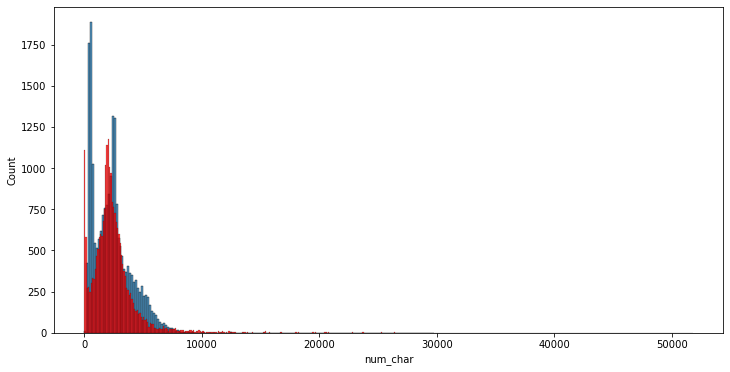

In [35]:
plt.figure(figsize=[12,6])
sns.histplot(df[df['class'] == 1]['num_char'])

sns.histplot(df[df['class'] == 0]['num_char'],color = 'red')

Fake news charcter are shorts

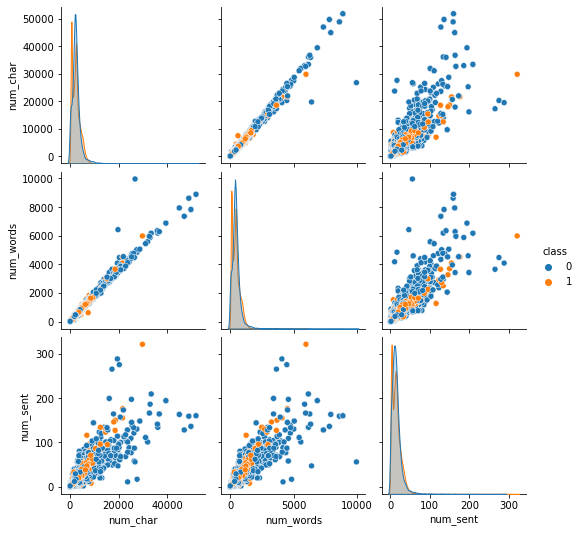

In [36]:
sns.pairplot(df,hue='class')

<AxesSubplot:>

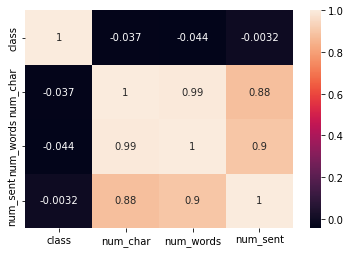

In [37]:
sns.heatmap(df.corr(),annot = True)

# 3. Data Prepriocessing

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91620\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
#All Liabrary
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def wordpot(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'  % re.escape(string.punctuation), '',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [41]:
df['text'] = df['text']

In [42]:
df.head()

,text,class,num_char,num_words,num_sent
0,Remember Joni Ernst? Conservatives were so exc...,0,2381,519,4
1,WASHINGTON (Reuters) - President-elect Donald ...,1,5796,1038,35
2,President Barack Obama and First Lady Michelle...,0,146,26,1
3,CANBERRA (Reuters) - Australia is trying to mo...,1,2099,390,15
4,CHICAGO (Reuters) - The Republican Party’s gri...,1,4825,883,29


In [43]:
X = df['text']
y = df['class']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc = TfidfVectorizer()

vc_train = vc.fit_transform(X_train)
vc_test  = vc.transform(X_test)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(vc_train,y_train)

LogisticRegression()

In [48]:
lr_pred = LR.predict(vc_test)

In [49]:
LR.score(vc_test,y_test)

0.9877896613190731

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5921
           1       0.98      0.99      0.99      5299

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(vc_train,y_train)

DecisionTreeClassifier()

In [52]:
dt_pred = DT.predict(vc_test)

In [53]:
DT.score(vc_test,y_test)

0.9964349376114082

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5921
           1       1.00      1.00      1.00      5299

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(vc_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
rf_pred = RF.predict(vc_test)

In [58]:
RF.score(vc_test, y_test)

0.9883244206773618

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5921
           1       0.99      0.99      0.99      5299

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [72]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordpot)
    new_x_test = new_def_test["text"]
    new_vc_test = vc.transform(new_x_test)
    pred_LR = LR.predict(new_vc_test)
    pred_DT = DT.predict(new_vc_test)
    pred_RF = RF.predict(new_vc_test)
    
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRF Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                        output_lable(pred_DT[0]),
                                                                                       output_lable(pred_RF[0])))

### Picking up a true news for testing

In [75]:
data_true_manual_testing['text'][21409]

'GENEVA (Reuters) - North Korea and the United States accused each other on Tuesday of posing a nuclear threat, with Pyongyang s envoy declaring it would never put its atomic arsenal up for negotiation. The debate at the United Nations began when the U.S. envoy said President Donald Trump s top priority was to protect the United States and its allies against the  growing threat  from North Korea. To do so, he said, the country was ready to use  the full range of capabilities at our disposal . U.S. Ambassador Robert Wood told the Conference on Disarmament that the  path to dialogue still remains an option  for Pyongyang, but that Washington was  undeterred in defending against the threat North Korea poses . Fears have grown over North Korea s development of missiles and nuclear weapons since Pyongyang test-launched intercontinental ballistic missiles (ICBMs) in July. Those fears worsened after Trump warned that North Korea would face  fire and fury  if it threatened the United States. H

In [76]:
news = str(input())

manual_testing(news)

'GENEVA (Reuters) - North Korea and the United States accused each other on Tuesday of posing a nuclear threat, with Pyongyang s envoy declaring it would never put its atomic arsenal up for negotiation. The debate at the United Nations began when the U.S. envoy said President Donald Trump s top priority was to protect the United States and its allies against the  growing threat  from North Korea. To do so, he said, the country was ready to use  the full range of capabilities at our disposal . U.S. Ambassador Robert Wood told the Conference on Disarmament that the  path to dialogue still remains an option  for Pyongyang, but that Washington was  undeterred in defending against the threat North Korea poses . Fears have grown over North Korea s development of missiles and nuclear weapons since Pyongyang test-launched intercontinental ballistic missiles (ICBMs) in July. Those fears worsened after Trump warned that North Korea would face  fire and fury  if it threatened the United States. H

It's showing not a fake news

hence our model is working